# Uvoz podatkov

In [30]:
import pandas
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 50

data = pandas.read_csv("data.csv")
data

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


# Pretvorba podatkov

In [31]:
# Odstranim valuto in vrednost plače, saj imam plačo že podano v USD.
data = data.drop(columns=['salary_currency', 'salary'])
data['salary_in_usd'] = data['salary_in_usd'].map(lambda salary: 2 if salary > 180_000 else (1 if salary > 90_000 else 0))

# Kategorične podatke označim kot kategorične.
# Funkcija pandas.get_dummies tip 'object' avtomatsko vzame kot kategorijo,
# če pustimo 'columns' atribut prazen.
"""
data['job_title'] = data['job_title'].astype('category')
data['job_category'] = data['job_category'].astype('category')
data['employee_residence'] = data['employee_residence'].astype('category')
data['experience_level'] = data['experience_level'].astype('category')
data['employment_type'] = data['employment_type'].astype('category')
data['company_location'] = data['company_location'].astype('category')
data['company_size'] = data['company_size'].astype('category')
data['work_setting'] = data['work_setting'].astype('category')
"""

data

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,1,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,2,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,0,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,2,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,1,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,1,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,2,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,1,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,1,United States,Entry-level,Full-time,Remote,United States,S


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_in_usd       9355 non-null   int64 
 4   employee_residence  9355 non-null   object
 5   experience_level    9355 non-null   object
 6   employment_type     9355 non-null   object
 7   work_setting        9355 non-null   object
 8   company_location    9355 non-null   object
 9   company_size        9355 non-null   object
dtypes: int64(2), object(8)
memory usage: 731.0+ KB


In [33]:
# Kategorične podatke pretvorim v dummy / indikatorske spremenljivke (one-hot encoding).
data = pandas.get_dummies(data)
data

,work_year,salary_in_usd,job_title_AI Architect,job_title_AI Developer,job_title_AI Engineer,job_title_AI Programmer,job_title_AI Research Engineer,job_title_AI Scientist,job_title_AWS Data Architect,job_title_Analytics Engineer,...,company_location_Switzerland,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_size_L,company_size_M,company_size_S
0,2023,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2023,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,2023,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,2023,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,2023,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
9351,2020,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
9352,2021,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
9353,2020,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [34]:
# Razdelim vhodne in izhodne podatke, v tem primeru je izhodni podatek (label) plača v USD.
input_data = data.drop(columns=['salary_in_usd'])
output_data = data['salary_in_usd']

# Razdelim 80% podatkov za treniranje modela, in 20% podatkov za testiranje (preverjanje).
## TODO: Stratifikacija
input_train, input_test, output_train, output_test = train_test_split(input_data, output_data, random_state=RANDOM_STATE, train_size=0.8)

features = input_train.columns

In [35]:
scaler = StandardScaler()
input_train = scaler.fit_transform(input_train)
input_test = scaler.transform(input_test)

In [36]:
input_training_df = pandas.DataFrame(input_train, columns=features)
input_training_df

,work_year,job_title_AI Architect,job_title_AI Developer,job_title_AI Engineer,job_title_AI Programmer,job_title_AI Research Engineer,job_title_AI Scientist,job_title_AWS Data Architect,job_title_Analytics Engineer,job_title_Analytics Engineering Manager,...,company_location_Switzerland,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_size_L,company_size_M,company_size_S
0,0.456520,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,0.387030,-0.298424,0.330256,-0.129799
1,-1.459685,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,0.387030,-0.298424,0.330256,-0.129799
2,-3.375889,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,0.387030,-0.298424,0.330256,-0.129799
3,0.456520,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,0.387030,-0.298424,0.330256,-0.129799
4,0.456520,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,-2.583776,-0.298424,0.330256,-0.129799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,-1.459685,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,0.387030,-0.298424,0.330256,-0.129799
7480,0.456520,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,0.387030,-0.298424,0.330256,-0.129799
7481,-1.459685,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,0.387030,-0.298424,0.330256,-0.129799
7482,0.456520,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,0.387030,-0.298424,0.330256,-0.129799


In [37]:
# Modeliranje
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [38]:
# tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
# decision_tree_parameters = {
#     "criterion": ["gini", "entropy"],
#     "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
#     "min_samples_leaf": [1, 2, 3, 4, 5],
#     "min_samples_split": [2, 3, 4, 5, 6],
# }
# cross_validation = 10
# grid_search = GridSearchCV(tree, decision_tree_parameters, cv=cross_validation, scoring = "accuracy")
# grid_search.fit(input_train, output_train)
# grid_search.best_estimator_.get_params()

In [39]:
tree = DecisionTreeClassifier(max_depth=10, criterion='gini', min_samples_leaf=1, min_samples_split=3, random_state=RANDOM_STATE)
tree.fit(input_train, output_train)
salary_tree = tree.predict(input_test)
print(tree.score(input_test, output_test))
cm_tree = confusion_matrix(output_test, salary_tree)

0.6205237840726884


In [40]:
input_train

array([[ 0.4565196 , -0.03657829, -0.04628687, ..., -0.29842427,
         0.3302565 , -0.12979918],
       [-1.45968494, -0.03657829, -0.04628687, ..., -0.29842427,
         0.3302565 , -0.12979918],
       [-3.37588948, -0.03657829, -0.04628687, ..., -0.29842427,
         0.3302565 , -0.12979918],
       ...,
       [-1.45968494, -0.03657829, -0.04628687, ..., -0.29842427,
         0.3302565 , -0.12979918],
       [ 0.4565196 , -0.03657829, -0.04628687, ..., -0.29842427,
         0.3302565 , -0.12979918],
       [ 0.4565196 , -0.03657829, -0.04628687, ..., -0.29842427,
         0.3302565 , -0.12979918]])

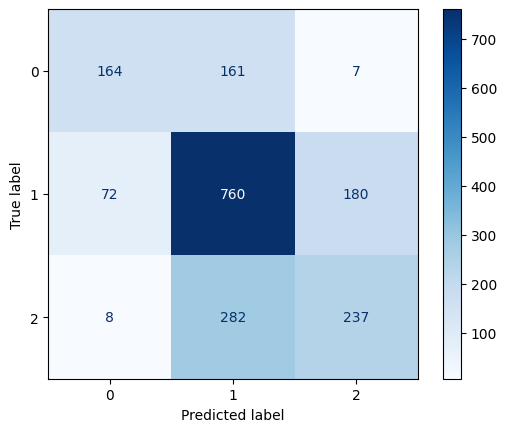

In [41]:
#Displaying confusion matrix of tree:
import matplotlib as mpl
display = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree.classes_)
display.plot(cmap=mpl.cm.Blues)

In [42]:
feat_imp = pandas.DataFrame({'features':features, 'feature_importance': tree.feature_importances_})
feat_imp.sort_values('feature_importance', ascending=False)

,features,feature_importance
216,employee_residence_United States,0.260224
128,job_category_Data Analysis,0.117637
222,experience_level_Senior,0.082518
221,experience_level_Mid-level,0.054822
135,job_category_Machine Learning and AI,0.051831
...,...,...
153,employee_residence_Costa Rica,0.000000
154,employee_residence_Croatia,0.000000
155,employee_residence_Cyprus,0.000000
156,employee_residence_Czech Republic,0.000000


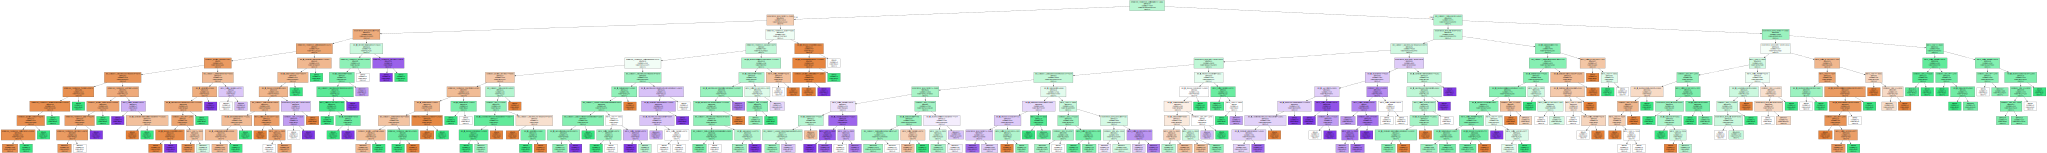

In [43]:
from IPython.display import display
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["0", "1", "2"], feature_names = features, impurity=True, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))